In [54]:
#imports
import os
import pandas as pd

import matplotlib.pyplot as plt

In [55]:
def symbol_to_path(symbol, base_dir="../data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


In [56]:
symbol = 'MSFT'
dates = pd.date_range('2016-11-11', '2017-11-10')

In [57]:
df = pd.DataFrame(index=dates)
df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
df_temp = df_temp.rename(columns={'Adj Close': symbol})
df = df.join(df_temp)
df = df.dropna(subset=[symbol])
# TODO: Print last 5 rows of the data frame
print( df.tail(5))       

                 MSFT
2017-11-06  84.470001
2017-11-07  84.269997
2017-11-08  84.559998
2017-11-09  84.089996
2017-11-10  83.870003


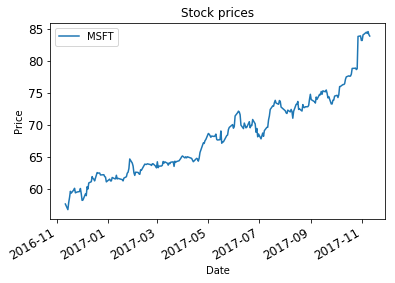

In [50]:
#plot data
%matplotlib inline
plot_data(df)

In [61]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)

#new method with new API version
def df_rolling_mean(df, window):
    """Return rolling mean of given values, using specified window size."""
    return df.rolling(window).mean()

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values, window=window)

#new method with new API version
def df_rolling_std(df, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return df.rolling(window).std()

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + (2*rstd)
    lower_band = rm - (2*rstd)
    return upper_band, lower_band

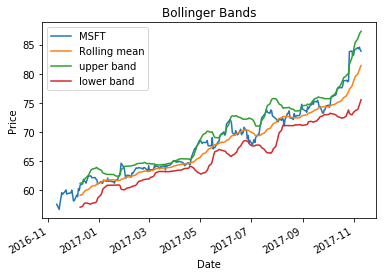

In [62]:
# Compute Bollinger Bands
# 1. Compute rolling mean
#rm_MSFT = get_rolling_mean(df['MSFT'], window=20)
rm_MSFT = df_rolling_mean(df['MSFT'], window=20)

# 2. Compute rolling standard deviation
#rstd_MSFT = get_rolling_std(df['MSFT'], window=20)
rstd_MSFT = df_rolling_std(df['MSFT'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_MSFT, rstd_MSFT)
    
# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['MSFT'].plot(title="Bollinger Bands", label='MSFT')
rm_MSFT.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

/Users/sumitchhabra/miniconda3/envs/stocks/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


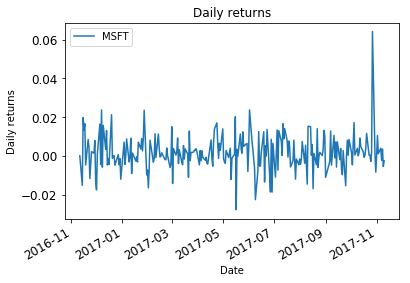

In [63]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:]/df[:-1].values) - 1
    daily_returns.ix[0,:] = 0
    return daily_returns

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
